In [1]:
import matplotlib.pyplot as plt
from Brinson_plain import SMA
import numpy as np
from math import pi, cos

In [165]:
my_SMA = SMA('../materials/sma_property_Brison.yml', 0, 0, 20, 0, 0)
my_SMA.calc_by_eps(0.005)

(0.004999999999999995, 122.49053531044697, 20, 0.04654606097868502, 0)

In [176]:
def curve_const_eps():
    T0 = 5
    T_max = 80
    my_SMA = SMA('../materials/sma_property_Brison.yml', 0.005, 128, 20, 0.046, 0)
    T_list1 = list(np.linspace(T0, T_max, 1000))
    sigma_list1, eps_list1, ksi_s_list1, ksi_T_list1 = [], [], [], []
    for T in T_list1:
        eps, sigma, _, ksi_s, ksi_T = my_SMA.calc_by_T(T)
        sigma_list1.append(sigma)
        eps_list1.append(eps)
        ksi_s_list1.append(ksi_s)
        ksi_T_list1.append(ksi_T)
    my_SMA.update(eps, sigma, T, ksi_s, ksi_T)
    # my_SMA.load = False
    T_list2 = list(np.linspace(T_max, T0, 1000))
    sigma_list2, eps_list2, ksi_s_list2, ksi_T_list2 = [], [], [], []
    for T in T_list2:
        eps, sigma, _, ksi_s, ksi_T = my_SMA.calc_by_T(T)
        sigma_list2.append(sigma)
        eps_list2.append(eps)
        ksi_s_list2.append(ksi_s)
        ksi_T_list2.append(ksi_T)
    res = {
        'T': {'load':T_list1, 'unload':T_list2},
        'sigma': {'load':sigma_list1, 'unload':sigma_list2},
        'eps': {'load':eps_list1, 'unload':eps_list2},
        'ksi_s': {'load':ksi_s_list1, 'unload':ksi_s_list2},
        'ksi_T': {'load':ksi_T_list1, 'unload':ksi_T_list2},
    }
    return res

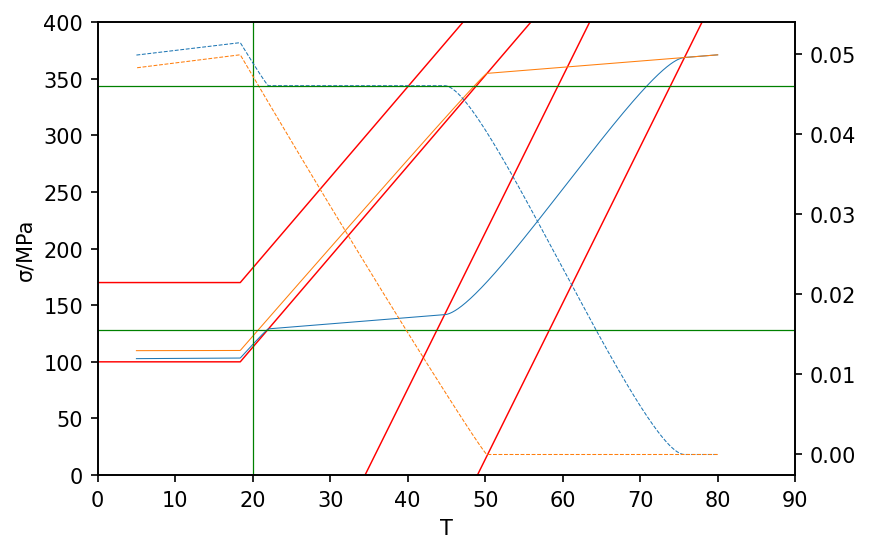

In [177]:
result = curve_const_eps()
fig=plt.figure(dpi=150)
ax = fig.add_subplot(111)
ax.plot([0, my_SMA.Ms, 60], [my_SMA.sigma_f, my_SMA.sigma_f, my_SMA.sigma_f + my_SMA.Cm * (60 - my_SMA.Ms)], c='red', linewidth=0.7)
ax.plot([0, my_SMA.Ms, 60], [my_SMA.sigma_s, my_SMA.sigma_s, my_SMA.sigma_s + my_SMA.Cm * (60 - my_SMA.Ms)], c='red', linewidth=0.7)

ax.plot([my_SMA.As, 80], [0, my_SMA.Ca * (80 - my_SMA.As)], c='red', linewidth=0.7)
ax.plot([my_SMA.Af, 80], [0, my_SMA.Ca * (80 - my_SMA.Af)], c='red', linewidth=0.7)
ax.set_xlabel('T')
ax.set_ylabel('σ/MPa')
ax.axis([0,90,0,400])
ax.plot(result['T']['load'], result['sigma']['load'], lw=0.5)
ax.plot(result['T']['unload'], result['sigma']['unload'], lw=0.5)
ax.axhline(128, c='green', linewidth=0.6)
ax.axvline(20, c='green', linewidth=0.6)
ax2 = ax.twinx()
ax2.plot(result['T']['load'], result['ksi_s']['load'], linestyle='--', lw=0.5)
ax2.plot(result['T']['unload'], result['ksi_s']['unload'], linestyle='--', lw=0.5)
ax2.axhline(0.046, c='green', linewidth=0.6)
#ax2.plot(T_list, ksi_T_list, linestyle='--', lw=0.5)
plt.show()

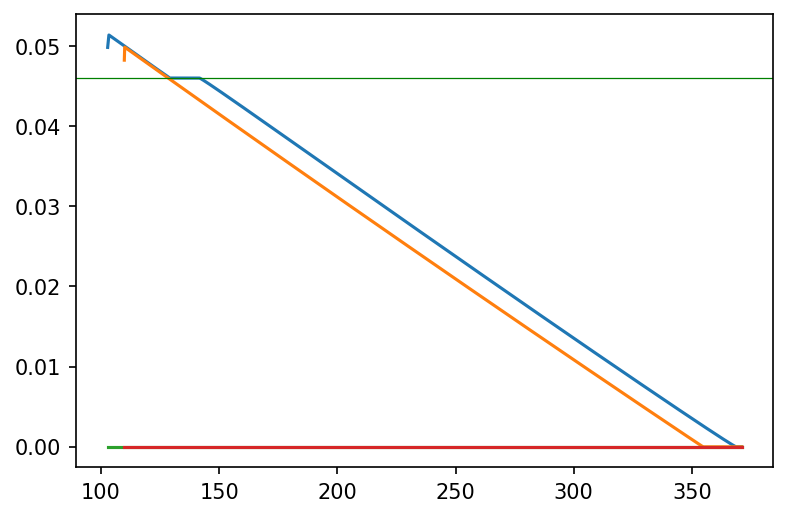

In [178]:
plt.figure(dpi=150)
plt.plot(result['sigma']['load'], result['ksi_s']['load'])
plt.plot(result['sigma']['unload'], result['ksi_s']['unload'])
plt.plot(result['sigma']['load'], result['ksi_T']['load'])
plt.plot(result['sigma']['unload'], result['ksi_T']['unload'])
plt.axhline(0.046, c='green', linewidth=0.6)
plt.show()

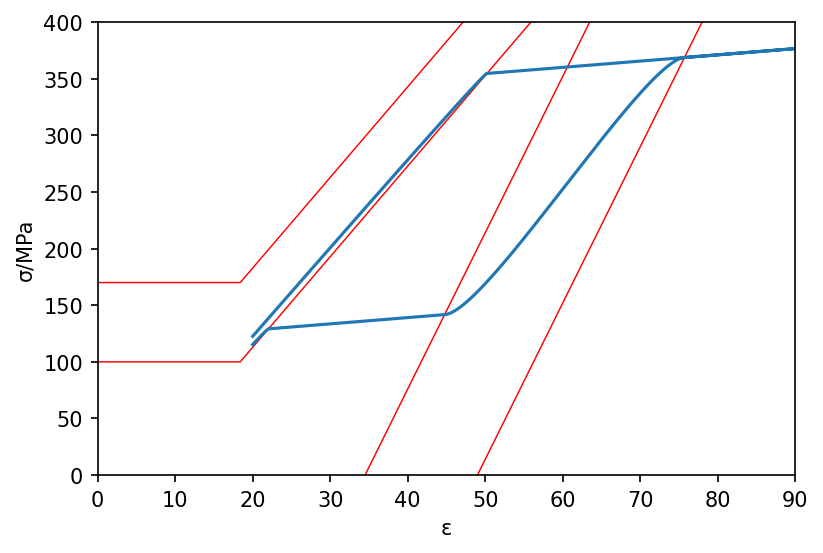

In [86]:
plt.figure(dpi=150)
plt.plot([0, my_SMA.Ms, 60], [my_SMA.sigma_f, my_SMA.sigma_f, my_SMA.sigma_f + my_SMA.Cm * (60 - my_SMA.Ms)], c='red', linewidth=0.7)
plt.plot([0, my_SMA.Ms, 60], [my_SMA.sigma_s, my_SMA.sigma_s, my_SMA.sigma_s + my_SMA.Cm * (60 - my_SMA.Ms)], c='red', linewidth=0.7)

plt.plot([my_SMA.As, 80], [0, my_SMA.Ca * (80 - my_SMA.As)], c='red', linewidth=0.7)
plt.plot([my_SMA.Af, 80], [0, my_SMA.Ca * (80 - my_SMA.Af)], c='red', linewidth=0.7)
plt.xlabel('T')
plt.ylabel('σ/MPa')
plt.axis([0,90,0,400])
plt.plot(T_list1+T_list2, sigma_list1+sigma_list2)
plt.show()

In [118]:
def curve_T(eps_max):
    my_SMA = SMA('../materials/sma_property_Brison.yml', 0, 0, 60, 0, 0)
    eps_list1 = list(np.linspace(0, eps_max, 1000))
    sigma_list1 = []
    for eps in eps_list1:
        _, sigma, T, ksi_s, ksi_T = my_SMA.calc_by_eps(eps)
        sigma_list1.append(sigma)

    my_SMA.update(eps, sigma, T, ksi_s, ksi_T)
    my_SMA.load = False

    eps_list2 = list(np.linspace(eps_max, 0, 1000))
    sigma_list2 = []
    for eps in eps_list2:
        _, sigma, T, ksi_s, ksi_T = my_SMA.calc_by_eps(eps)
        sigma_list2.append(sigma)
    eps_list = eps_list1 + eps_list2
    sigma_list = sigma_list1 + sigma_list2
    return eps_list, sigma_list

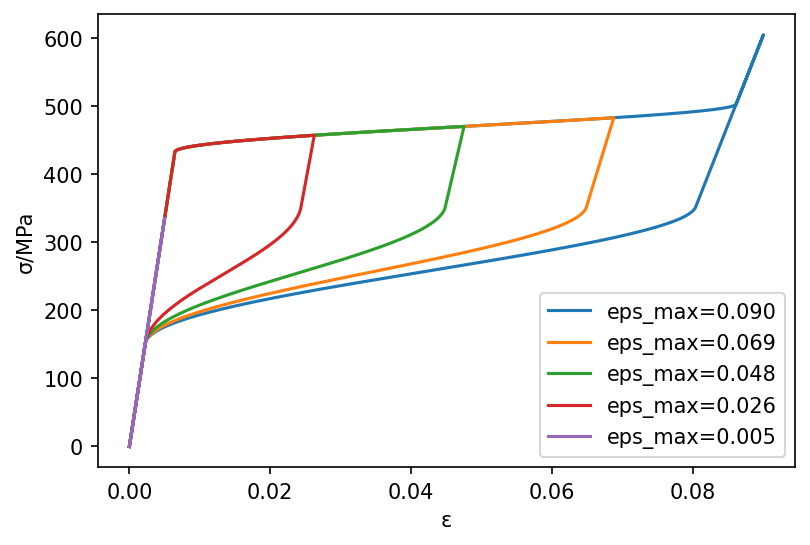

In [119]:
plt.figure(dpi=150)
plt.xlabel('ε')
plt.ylabel('σ/MPa')
eps_maxes = np.linspace(0.09, 0.005, 5)
for eps_max in eps_maxes:
    eps_list, sigma_list = curve_T(eps_max)
    plt.plot(eps_list, sigma_list)
plt.legend(['eps_max=%.3f' % (eps_max) for eps_max in eps_maxes])
plt.show()

In [60]:
my_SMA = SMA('../materials/sma_property_Brison.yml', 0, 0, 60, 0, 0)

In [61]:
eps_max = 0.06
eps_list1 = list(np.linspace(0, eps_max, 1000))
sigma_list1 = []
for eps in eps_list1:
    _, sigma, T, ksi_s, ksi_T = my_SMA.calc_by_eps(eps)
    sigma_list1.append(sigma)

my_SMA.update(eps, sigma, T, ksi_s, ksi_T)
my_SMA.load = False

eps_list2 = list(np.linspace(eps_max, 0, 1000))
sigma_list2 = []
for eps in eps_list2:
    _, sigma, T, ksi_s, ksi_T = my_SMA.calc_by_eps(eps)
    sigma_list2.append(sigma)
eps_list = eps_list1 + eps_list2
sigma_list = sigma_list1 + sigma_list2

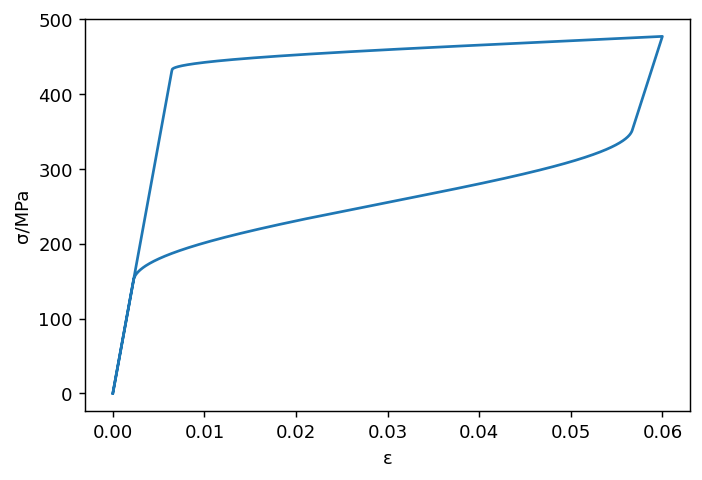

In [62]:
plt.figure(dpi=130)
plt.xlabel('ε')
plt.ylabel('σ/MPa')
plt.plot(eps_list, sigma_list)
plt.show()

In [1]:
import matplotlib.pyplot as plt
from Brinson_plain import SMA
import numpy as np
from math import pi, cos

In [121]:
my_SMA = SMA('../materials/sma_property_Brison.yml', 0, 0, 60, 0, 0)

In [122]:
eps_max = 0.06
eps_overload = 0.09
unload = False
eps_list1 = list(np.linspace(0, eps_overload, 1000))
sigma_list1, ksi_list1 = [], []
for eps in eps_list1:
    _, sigma, T, ksi_s, ksi_T = my_SMA.calc_by_eps(eps)
    sigma_list1.append(sigma)
    ksi_list1.append(ksi_s+ksi_T)


eps, sigma, T, ksi_s, ksi_T = my_SMA.calc_by_eps(eps_max)
my_SMA.update(eps, sigma, T, ksi_s, ksi_T)
sigma_0, ksi_0 = sigma, ksi_s
if unload:
    my_SMA.load = False

eps_list2 = list(np.linspace(0, eps_overload, 1000))
sigma_list2, ksi_list2 = [], []
for eps in eps_list2:
    _, sigma, T, ksi_s, ksi_T = my_SMA.calc_by_eps(eps)
    sigma_list2.append(sigma)
    ksi_list2.append(ksi_s+ksi_T)

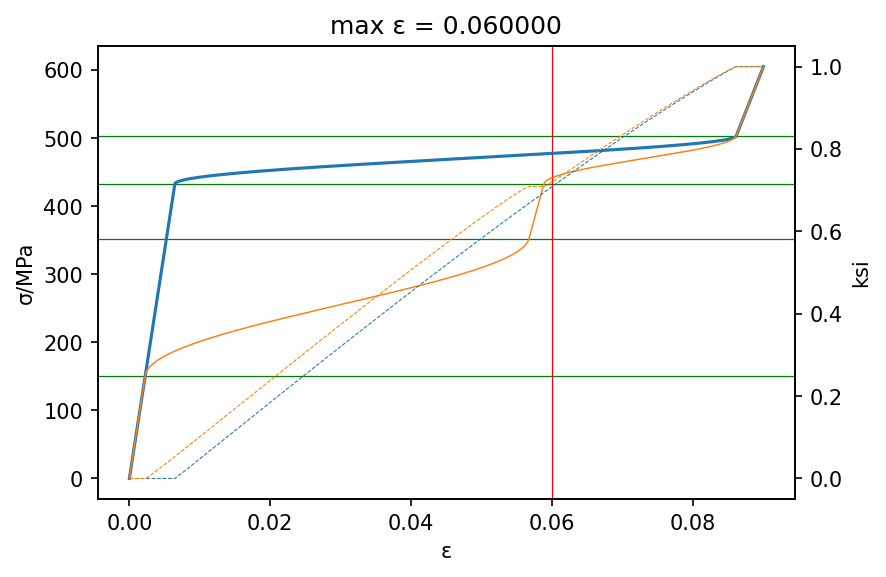

In [123]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
plt.title('max ε = %f' % eps_max)
ax.set_xlabel('ε')
ax.set_ylabel('σ/MPa')
ax.axhline(151, c='green', linewidth=0.6)
ax.axhline(352, c='green', linewidth=0.6)
ax.axhline(433, c='green', linewidth=0.6)
ax.axhline(503, c='green', linewidth=0.6)
ax.axvline(eps_max, c='red', linewidth=0.6)
ax.plot(eps_list1, sigma_list1)
ax.plot(eps_list2, sigma_list2, lw=0.7)
ax2 = ax.twinx()
ax2.set_ylabel('ksi')
ax2.plot(eps_list1, ksi_list1, linestyle='--', lw=0.5)
ax2.plot(eps_list2, ksi_list2, linestyle='--', lw=0.5)

plt.show()

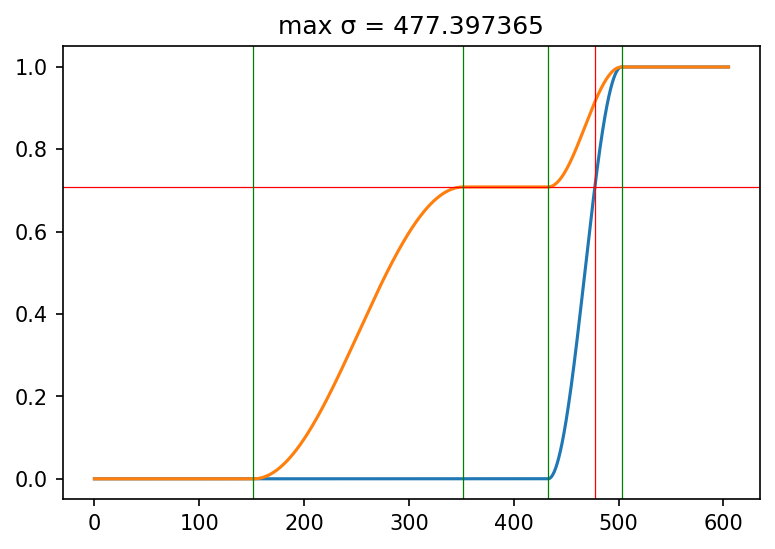

In [124]:
plt.figure(dpi=150)
plt.title('max σ = %f' % sigma_0)
plt.plot(sigma_list1, ksi_list1)
plt.plot(sigma_list2, ksi_list2)
plt.axhline(ksi_0, c='red', linewidth=0.6)
plt.axvline(sigma_0, c='red', linewidth=0.6)
plt.axvline(151, c='green', linewidth=0.6)
plt.axvline(352, c='green', linewidth=0.6)
plt.axvline(433, c='green', linewidth=0.6)
plt.axvline(503, c='green', linewidth=0.6)
plt.show()

In [187]:
T = 100
th = 47.7
R = 3
pi = 3.14159265
d = 0.4
print(4*T/R/pi/d**2)
print(R*th*pi/180)

265.2582387895939
2.4975661567500005
